# Tarea 01
#### Luis Eduardo Jiménez del Muro
#### 30/01/2025
---

## Instrucciones

Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

## Paqueterías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importación de datos y limpieza de datos

In [2]:
df = pd.read_csv('housing.csv')
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df = df[df['median_house_value'] != df['median_house_value'].max()]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Funciones

In [3]:
# Gráfica para análisis Bivariado
def graficar_bivariado(grouped_data_x, grouped_data_y):
    plt.figure(figsize=(12,8))
    plt.plot(grouped_data_x, grouped_data_y, marker='o', color='cadetblue')
    plt.title(f'Análisis bivariado {grouped_data_x.name}')
    plt.ylabel('Median House Value')
    plt.xlabel(grouped_data_x.name)
    plt.grid(alpha=0.5)
    
    
    
# Resultados de la regresión lineal
def regresion(df, x, y):
    model = linear_model.LinearRegression()
    X = df[x].values.reshape(-1, 1)
    Y = df[y]
    
    # Ajustar el modelo
    model.fit(X, Y)
    b0 = model.intercept_
    b1 = model.coef_[0]
    mse = mean_squared_error(y_true=Y, y_pred=model.predict(X))
    r2 = r2_score(y_true=Y, y_pred=model.predict(X))
    
    # Graficar resultados
    plt.figure(figsize=(12, 8))
    plt.scatter(df[x], df[y], label='Datos', s=10, color='cadetblue')
    plt.scatter(df[x], model.predict(X), color='red', label='Regresión', s=15)
    plt.title(f'Regresión utilizando {x[0]}')
    plt.xlabel(x[0])
    plt.ylabel(y)
    plt.grid(alpha=0.5)
    plt.legend(loc='best')
    plt.show()
    
    # Imprimir resultados
    print()
    print(f'----Resultados de la Regresión ({x[0]}):----')
    print()
    print(f'B0: {b0:.4f}')
    print(f'B1: {b1:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'R2: {r2:.4f}')
    print()

## Housing Median Age

### Análisis Bivariado

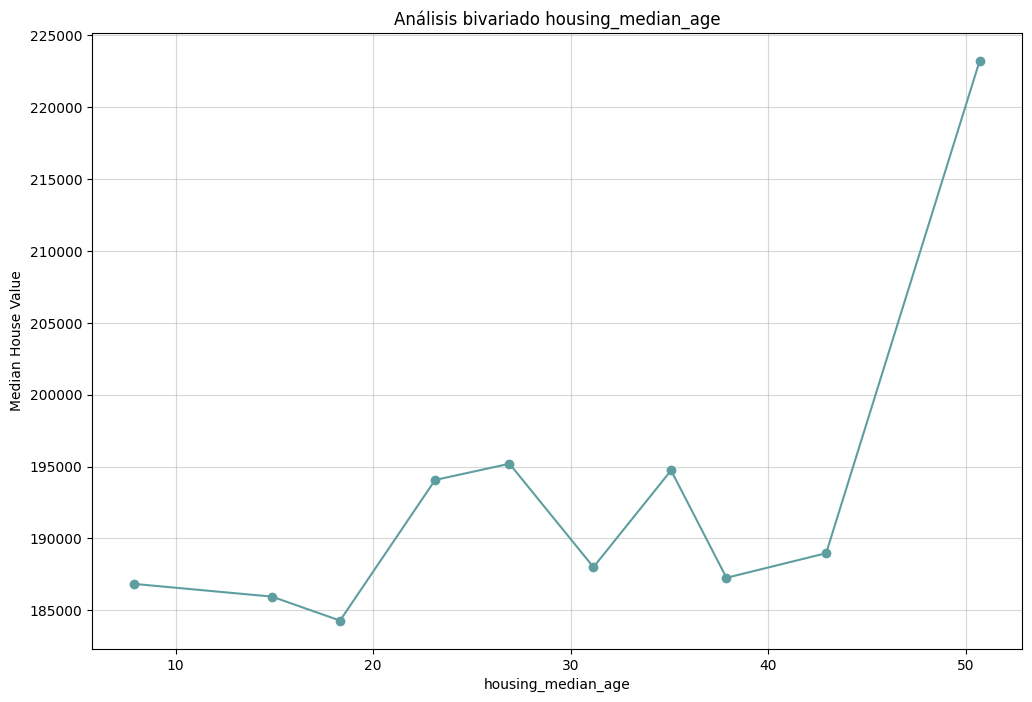

In [4]:
df['housing_mendian_age_bins'] = pd.qcut(df['housing_median_age'], q=10, labels=False) + 1
grouped_age = df.groupby('housing_mendian_age_bins')[['housing_median_age', 'median_house_value']].mean()

graficar_bivariado(grouped_age['housing_median_age'], grouped_age['median_house_value'])

La relación que existe entre Housing Median Age y Median House Value no es lineal, por lo que seguramente, la regresión lineal no podrá modelarse correctamente y tendrá malos resultados.

### Regresión lineal

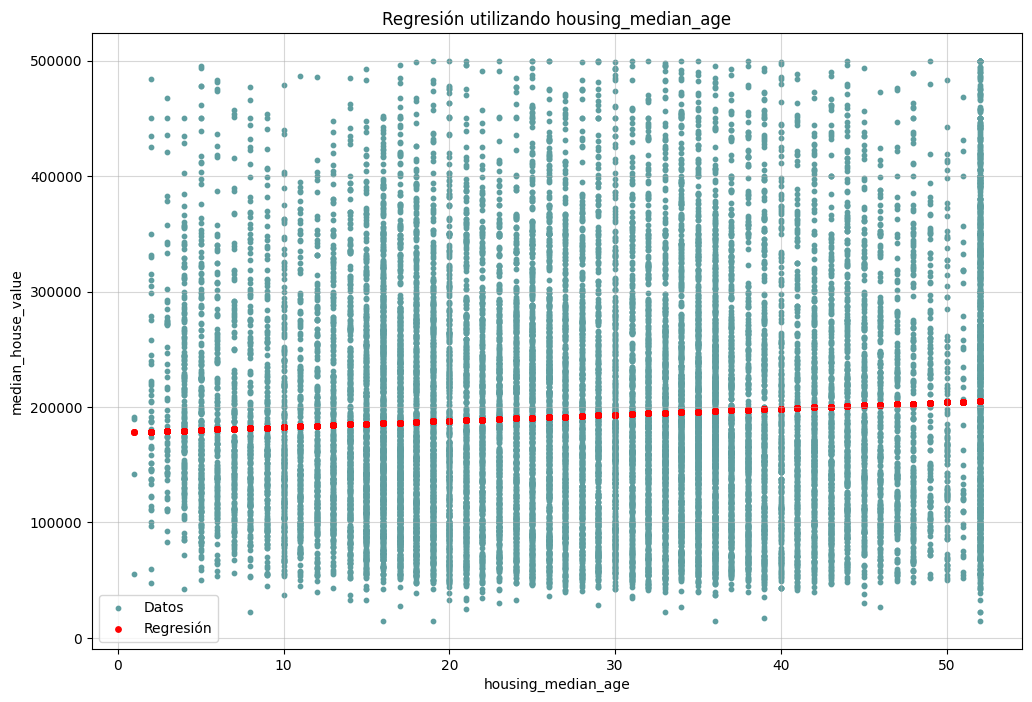


----Resultados de la Regresión (housing_median_age):----

B0: 177411.7981
B1: 530.7537
MSE: 9502976334.7060
R2: 0.0046



In [5]:
regresion(df, ['housing_median_age'], 'median_house_value')

### Ecuación del modelo

$$ y = 177411.7981 + 530.7537 * housing  median  age $$

## Total Rooms

### Análisis Bivariado

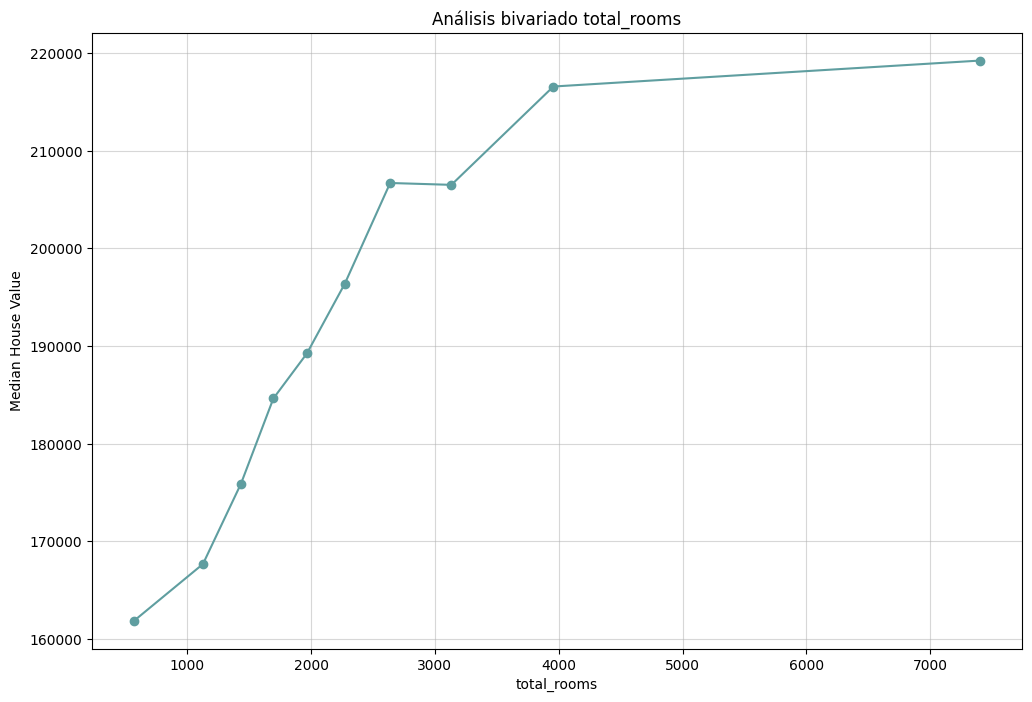

In [6]:
df['total_rooms_bins'] = pd.qcut(df['total_rooms'], q=10, labels=False) + 1
grouped_rooms = df.groupby('total_rooms_bins')[['total_rooms', 'median_house_value']].mean()

graficar_bivariado(grouped_rooms['total_rooms'], grouped_rooms['median_house_value'])

La relación que existe entre Total Rooms y Median House Value no es lineal, por lo que seguramente, la regresión lineal no podrá modelarse correctamente y tendrá malos resultados.

### Regresión lineal

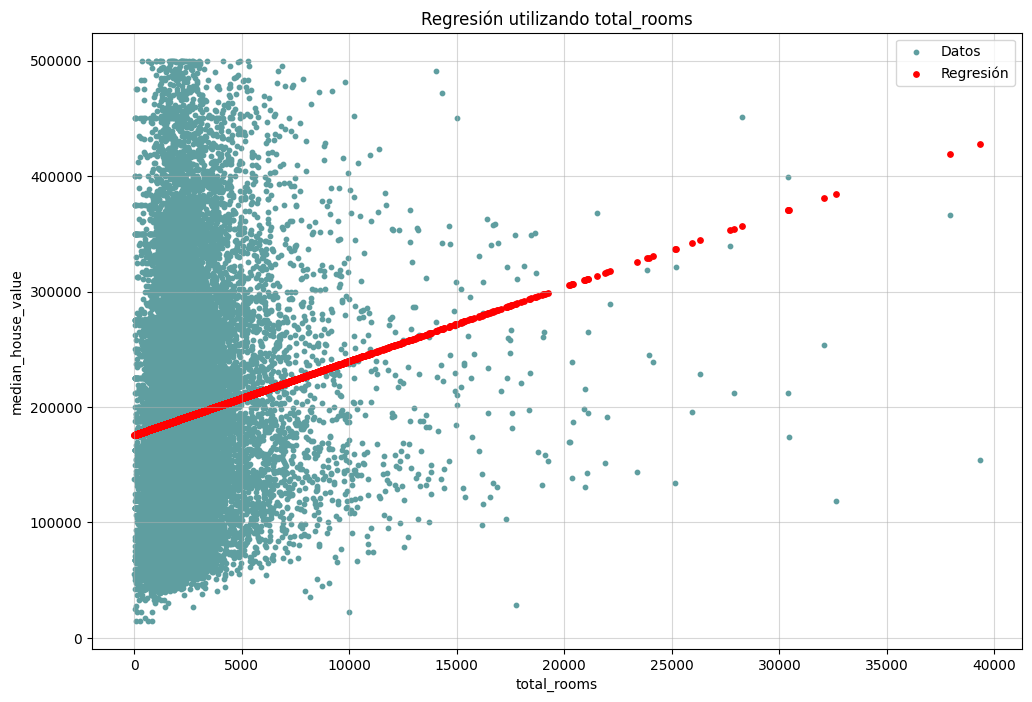


----Resultados de la Regresión (total_rooms):----

B0: 175680.6016
B1: 6.4118
MSE: 9351447180.2159
R2: 0.0205



In [7]:
regresion(df, ['total_rooms'], 'median_house_value')

### Ecuación del modelo

$$ y = 175680.6016 + 6.4118 * total rooms$$

## Total Bedrooms

### Análisis Bivariado

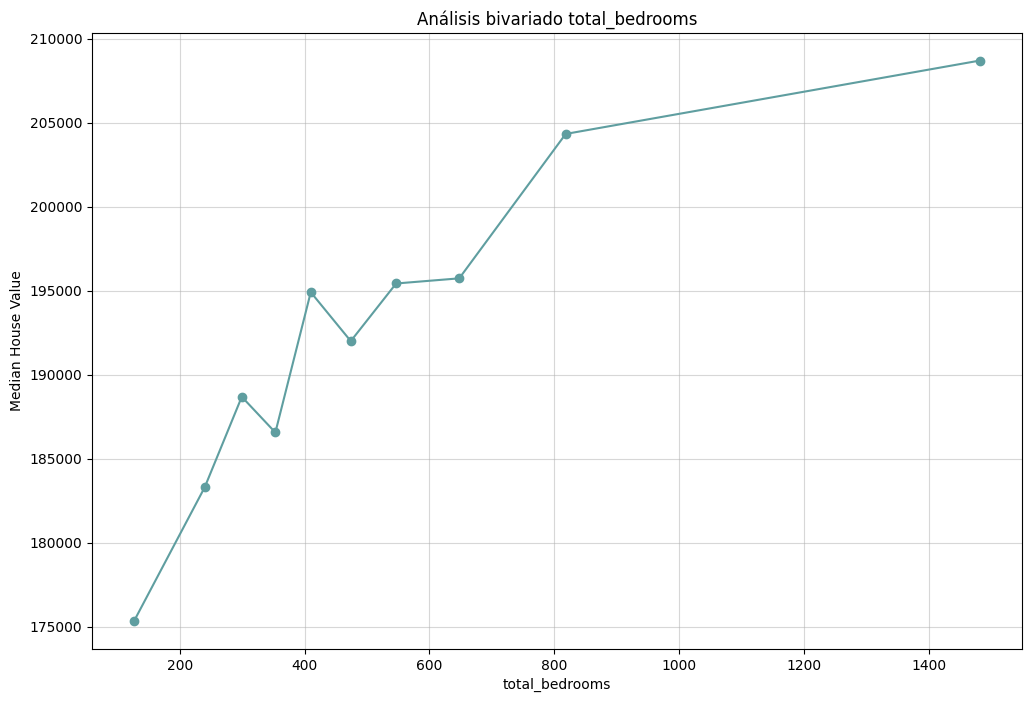

In [8]:
df['total_bedrooms_bins'] = pd.qcut(df['total_bedrooms'], q=10, labels=False) + 1
grouped_bedrooms = df.groupby('total_bedrooms_bins')[['total_bedrooms', 'median_house_value']].mean()

graficar_bivariado(grouped_bedrooms['total_bedrooms'], grouped_bedrooms['median_house_value'])

La relación que existe entre Total Bedrooms y Median House Value no es lineal, por lo que, seguramente la regresión lineal no podrá modelarse correctamente y tendrá malos resultados.

### Regresión lineal

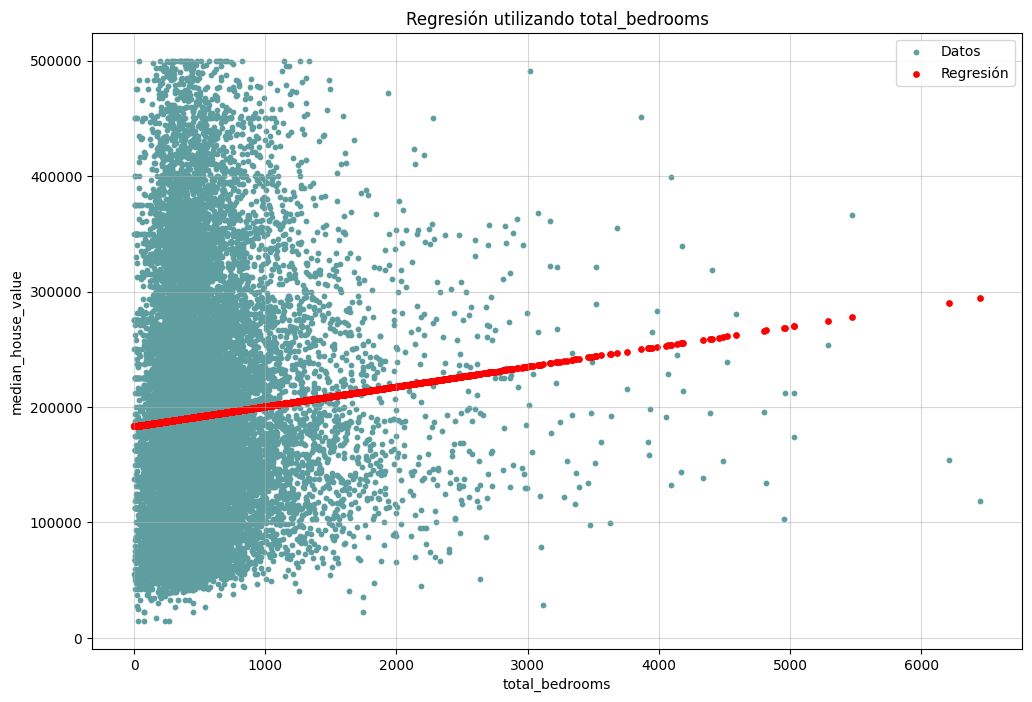


----Resultados de la Regresión (total_bedrooms):----

B0: 183158.0085
B1: 17.2710
MSE: 9494373254.7607
R2: 0.0055



In [9]:
regresion(df, ['total_bedrooms'], 'median_house_value')

### Ecuación del modelo

$$ y = 183158.0085 + 17.2710 * total bedrooms $$

## Population

### Análisis Bivariado

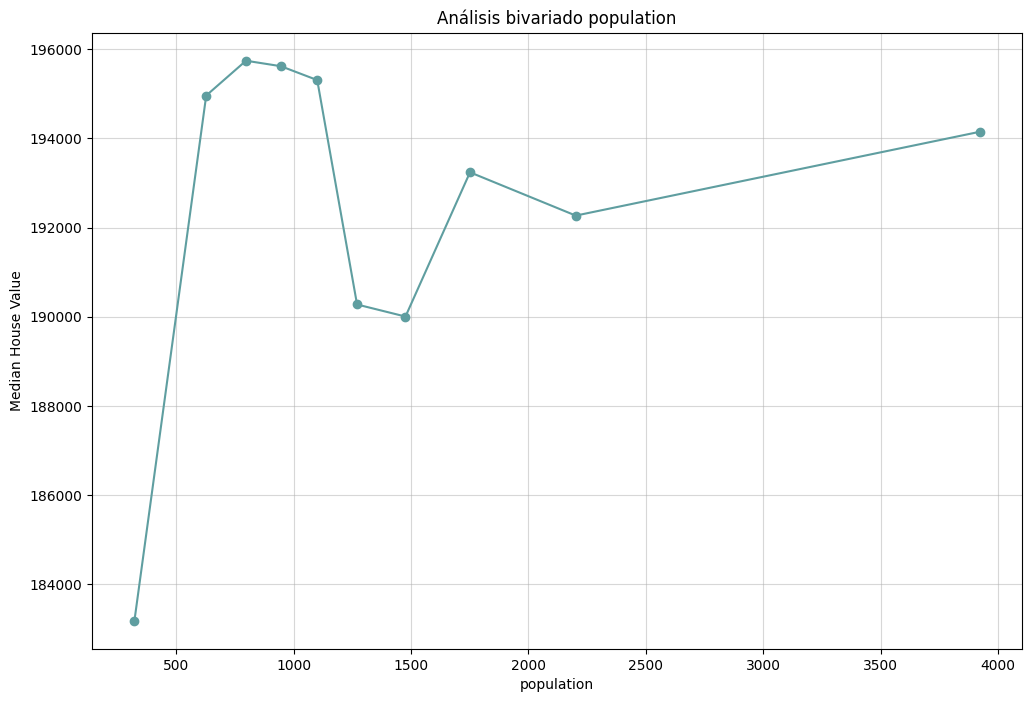

In [10]:
df['population_bins'] = pd.qcut(df['population'], q=10, labels=False) + 1
grouped_population = df.groupby('population_bins')[['population', 'median_house_value']].mean()

graficar_bivariado(grouped_population['population'], grouped_population['median_house_value'])

La relación que existe entre Population y Median House Value no es lineal, por lo que, seguramente la regresión lineal no podrá modelarse correctamente y tendrá malos resultados.

### Regresión lineal

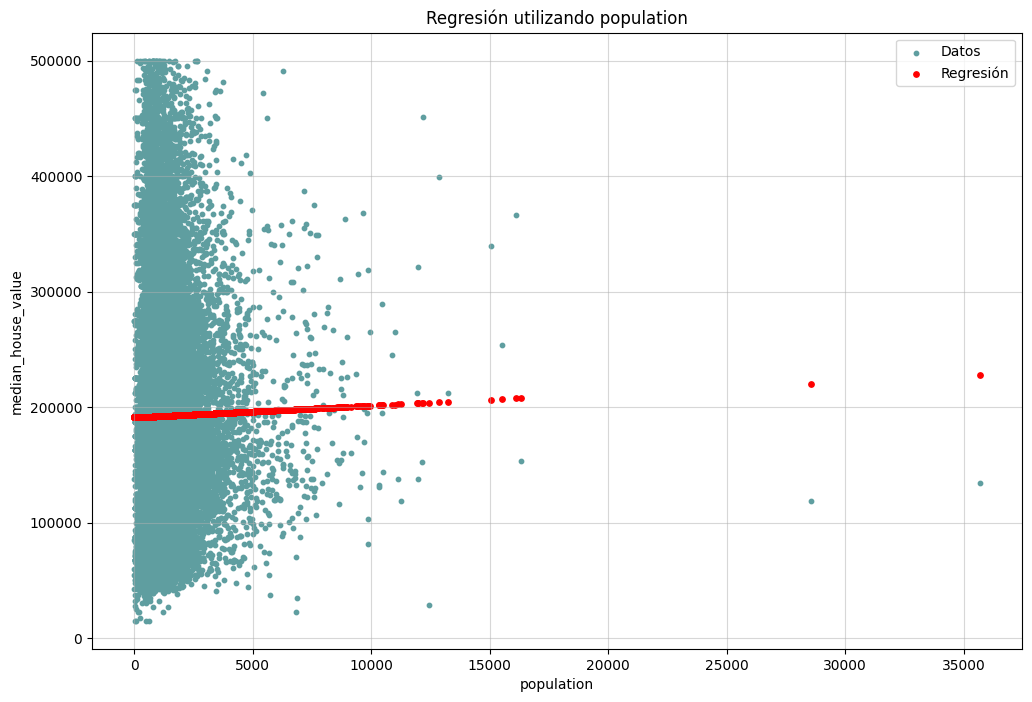


----Resultados de la Regresión (population):----

B0: 191005.0921
B1: 1.0222
MSE: 9545687211.7934
R2: 0.0001



In [11]:
regresion(df, ['population'], 'median_house_value')

### Ecuación del modelo

$$ y = 191005.0921 + 1.0222 * population $$

## Households

### Análisis Bivariado

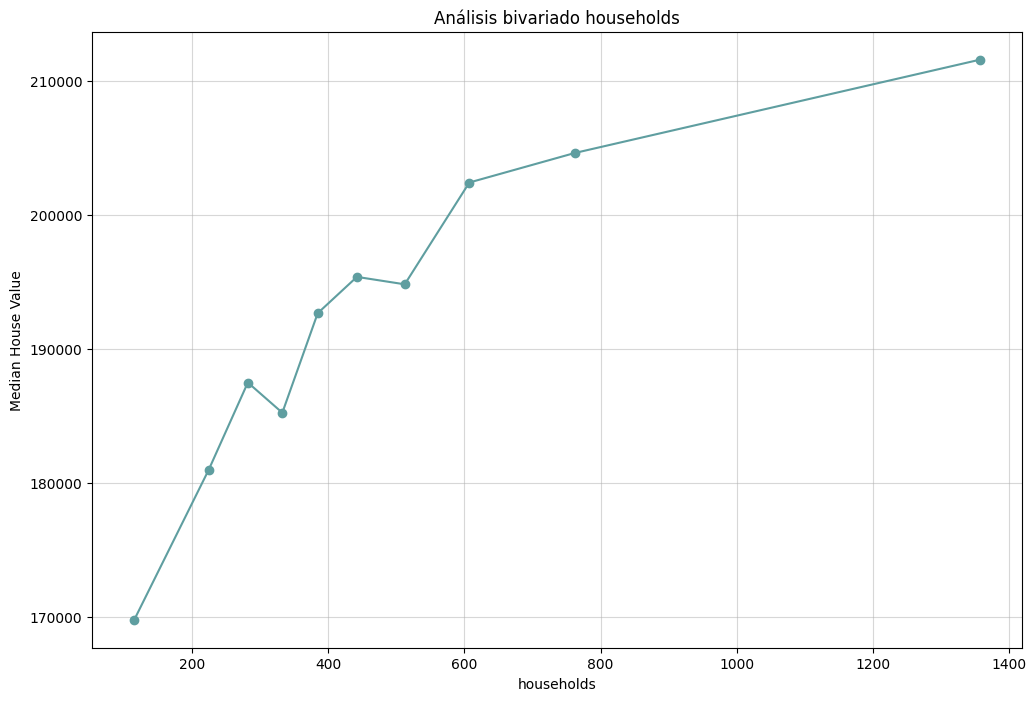

In [12]:
df['households_bins'] = pd.qcut(df['households'], q=10, labels=False) + 1
grouped_age = df.groupby('households_bins')[['households', 'median_house_value']].mean()

graficar_bivariado(grouped_age['households'], grouped_age['median_house_value'])

La relación que existe entre Households y Median House Value no es lineal, por lo que seguramente la regresión lineal no podrá modelarse correctamente y tendrá malos resultados.

### Regresión lineal

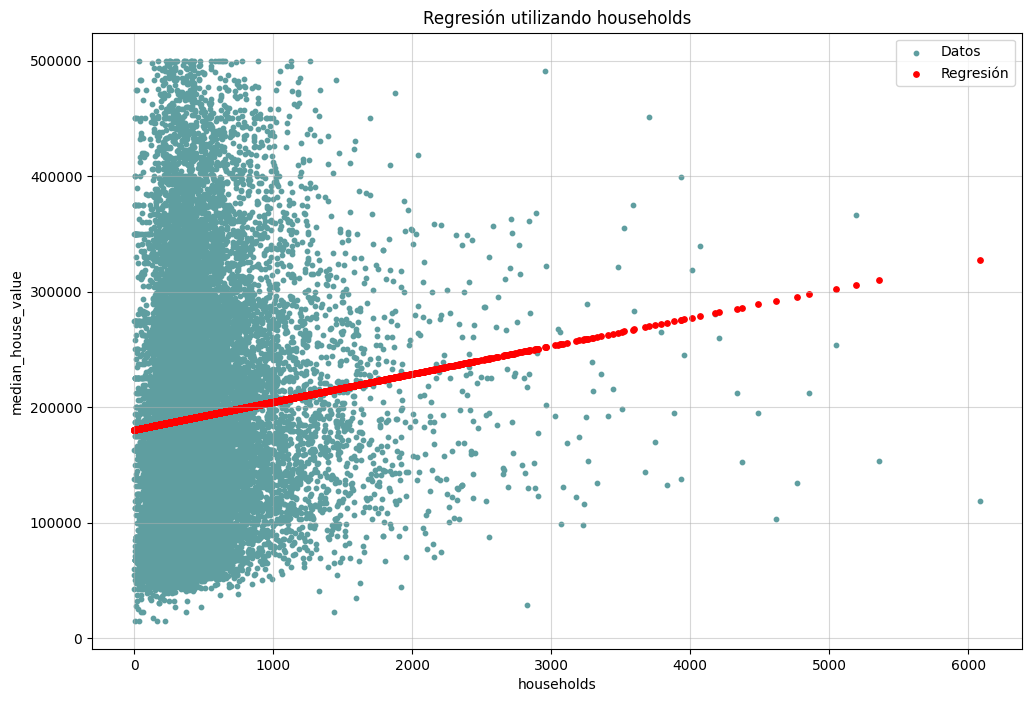


----Resultados de la Regresión (households):----

B0: 180352.8303
B1: 24.1928
MSE: 9461083732.7945
R2: 0.0090



In [13]:
regresion(df, ['households'], 'median_house_value')

### Ecuación del modelo

$$ y = 180352.8303 + 24.1928 * households $$

## Median Income

### Análisis Bivariado

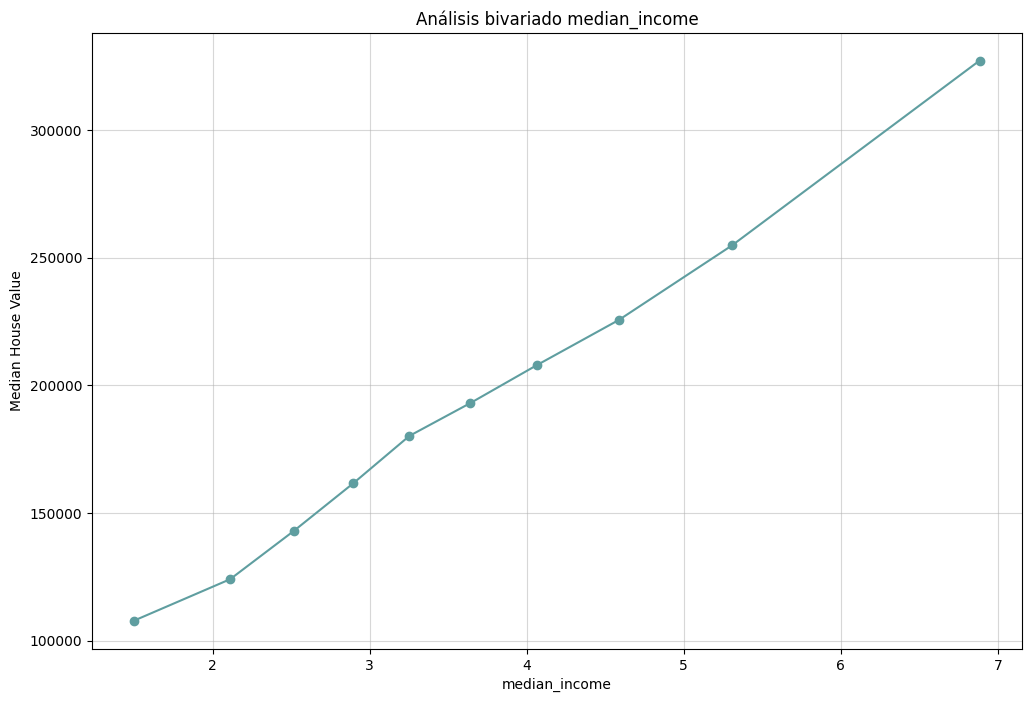

In [14]:
df['median_income_bins'] = pd.qcut(df['median_income'], q=10, labels=False) + 1
grouped_median_income = df.groupby('median_income_bins')[['median_income', 'median_house_value']].mean()

graficar_bivariado(grouped_median_income['median_income'], grouped_median_income['median_house_value'])

La relación que existe entre Median Income y Median House Value es la única que se acerca a tener una relación lineal, por ende, podemos esperar que una regresión lineal tenga un mejor ajuste con esta variable.

### Regresión lineal

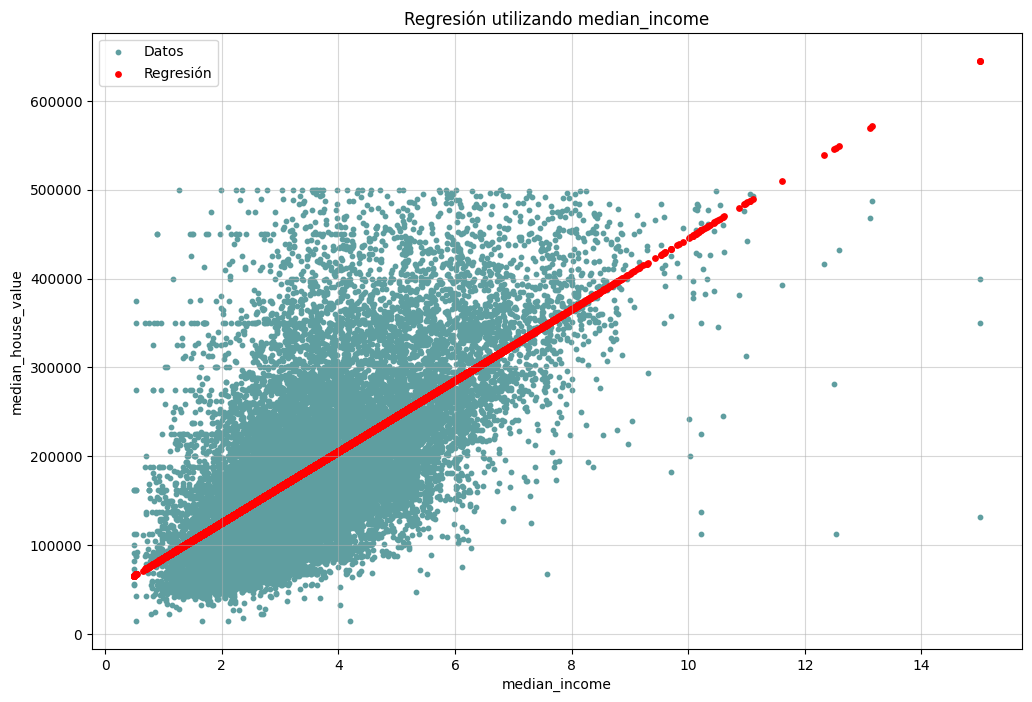


----Resultados de la Regresión (median_income):----

B0: 45456.9968
B1: 39987.0121
MSE: 5604611138.0371
R2: 0.4129



In [15]:
regresion(df, ['median_income'], 'median_house_value')

### Ecuación del modelo

$$ y = 45456.9968 + 39987.0121 * median income $$

## Conclusiones

- Median Income fue la variable logró ajustar la mejor regresión lineal con un R2 de 0.4129, dado que, como se observó, fue la única con relación lineal con el Meduan House Value.
- Median Income fue la variable que logró tener un rango mayor en el eje $y$ en la gráfica del análisis bivariado, lo que significa que el modelo podrá explicar un rango mayor de datos que los otros modelos.
- Ninguna de las otras variables logró obtener un R2 mayor a 0.03.
- Ninguna de las otras variables tuvo una relación lineal.
- Aunque las la mayoría de las variables no lograron un buen modelo no hay que descartarlas, ya que, podrían ser útiles en un modelo de regresión lineal múltiple. 